In [1]:
# ------------------------------------------------------------------------
#
# TITLE - visualize_triaxial_halos.ipynb
# AUTHOR - James Lane
# PROJECT - AST1501
# CONTENTS:
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Show the density contours of the triaxial halo
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np
import pdb, sys, importlib, copy, importlib
from tqdm import tqdm_notebook

## Plotting
import matplotlib
from matplotlib import pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import colors
# from matplotlib import cm

## Astropy
from astropy import units as apu
# from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from astropy import table

## galpy
from galpy import orbit
from galpy import potential
from galpy import actionAngle as aA
from galpy import df
from galpy.util import bovy_coords as gpcoords
from galpy.util import bovy_conversion as gpconv
from galpy.util import bovy_plot as gpplot

## Project-specific
sys.path.insert(0,'../../src/')
import ast1501.potential

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Debugging, automatically drop in during error
from IPython.core.debugger import set_trace

In [25]:
abc_halo_b = 0.9
abc_halo_phi = np.pi/4
# tripot = potential.TriaxialNFWPotential(b=abc_halo_b,pa=abc_halo_phi)
tripot = ast1501.potential.make_MWPotential2014_triaxialNFW(halo_b=abc_halo_b,
                                                             halo_phi=abc_halo_phi)
potential.turn_physical_off(tripot)

# Check to make sure the code actually produces a non-axisymmetric potential

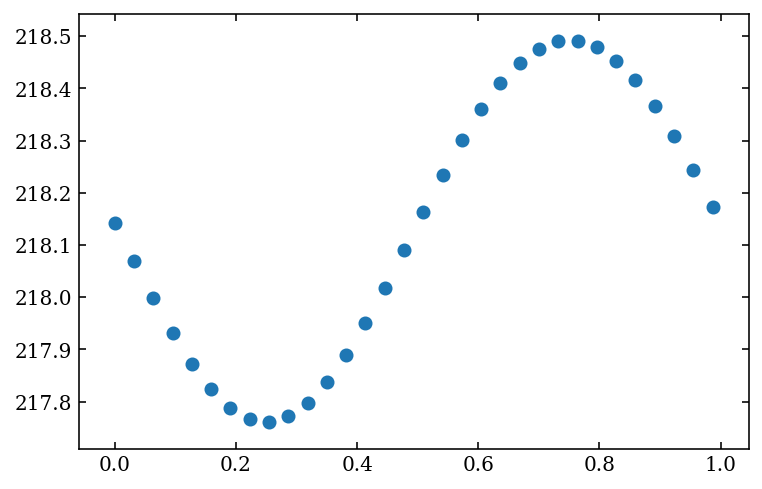

In [30]:
phis = np.arange(0,np.pi,0.1)
vcircs = np.zeros_like(phis)
for i in range(len(phis)):
    vcircs[i] = potential.vcirc(trihalo,R=8/trihalo[0]._ro,phi=phis[i]).value
###i

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(phis/np.pi,vcircs)
fig.set_facecolor('White')
plt.show()

# Plot

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)



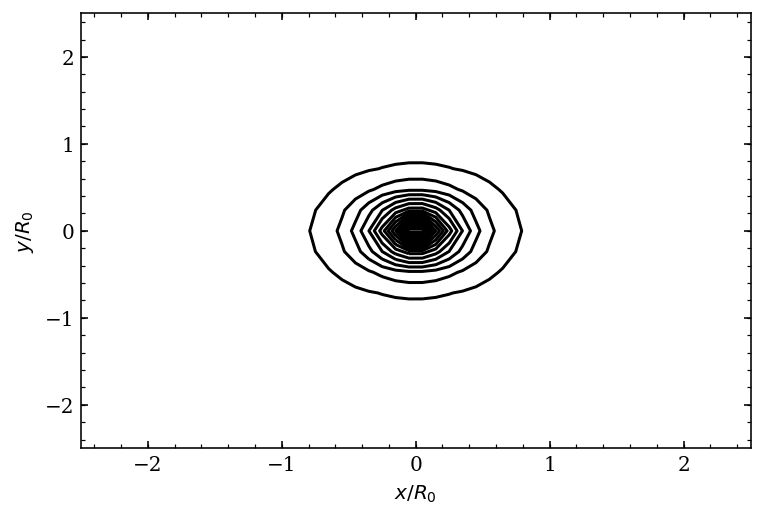

In [49]:
potential.plotDensities(tripot,rmin=-20*apu.kpc,rmax=20*apu.kpc,zmin=-20*apu.kpc,
                         zmax=20*apu.kpc,nrs=50,xy=True,justcontours=True)
fig=plt.gcf()
fig.set_facecolor('White')

# Manually plot elliptical density contours

The triaxial NFW takes the form:

$\rho(x,y,z) = \frac{\mathrm{amp}}{4\,\pi\,a^3}\,\frac{1}{(m/a)\,(1+m/a)^{2}}$

with

$m^2 = x'^2 + \frac{y'^2}{b^2}+\frac{z'^2}{c^2}$

and $(x',y',z')$ is a rotated frame wrt $(x,y,z)$ specified by parameters ``zvec`` and ``pa`` which specify (a) ``zvec``: the location of the $z'$ axis in the $(x,y,z)$ frame and (b) ``pa``: the position angle of the $x'$ axis wrt the $\tilde{x}$ axis, that is, the $x$ axis after rotating to ``zvec``.

Solving for constant density $\rho$ in the $(x,y,z)$ coordinate system assuming ``zvec`` is $(0,0,1)$ and $c$ is equal to $a$.

Here we have that $z'=z=0$ for the galactic plane, $x'=x\cos(\phi)+y\sin(\phi)$ and $y'=x\sin(\phi)-y\cos(\phi)$

$\rho_{1} \propto \frac{1}{(m/a)\,(1+m/a)^{2}}$